In [46]:

import pyLDAvis
import pyLDAvis.gensim  # 
import matplotlib.pyplot as plt

In [19]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [1]:
import random
import re
import os
import json
import time
import tweepy
import jsonpickle
import preprocessor as p
import nltk
from nltk.corpus import stopwords
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
#nltk.download('punkt')

from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys
import re
import fire
from collections import Counter
import requests

In [2]:
import logging
import os
import pandas as pd
import re
import scrapy
from googlesearch import search
from scrapy.crawler import CrawlerProcess
from scrapy.linkextractors.lxmlhtml import LxmlLinkExtractor

In [3]:
from textblob import TextBlob

#general text pre-processor
#!pip install nltk
import nltk
from nltk.corpus import stopwords
#nltk.download('punkt')

#tweet pre-processor 
#!pip install tweet-preprocessor
import preprocessor as p
import numpy as np


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

C:\Users\Hp\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='h2',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_elements)

In [6]:
def get_urls(tag,n,language):
    urls=[url for url in search(tag,stop=n,lang=language,pause=2.0)][:n]
    return urls
          

In [5]:
url_journalist=get_urls('Twitter handles of top journalist in Nigeria',100,'en')

HTTPError: HTTP Error 429: Too Many Requests

In [ ]:
url_government=get_urls('Twitter handles of government officials in Nigeria',100,'en')


In [7]:
url_celebrities=get_urls('Twitter handles of celebrities in Nigeria',100,'en')

HTTPError: HTTP Error 429: Too Many Requests

In [ ]:
url_celebrities

In [ ]:
for url in url_celebrities:
    if 'twitter.com' in url:
        print (url)

In [ ]:
##(@\w+)|
a=re.search('(?:https?:\/\/)?(?:www\.)?twitter\.com\/(?:#!\/)?@?([^\/\?\s]*)',str(url_government[1]))
print (a[1])

In [ ]:
journalist=[]
for i in url_journalist:
    search_=re.search('(?:https?:\/\/)?(?:www\.)?twitter\.com\/(?:#!\/)?@?([^\/\?\s]*)',str(i))
    if search_ !=None:
        journalist.append(search_[1])

In [ ]:
govt_official=[]
for i in url_government:
    search1=re.search('(?:https?:\/\/)?(?:www\.)?twitter\.com\/(?:#!\/)?@?([^\/\?\s]*)',str(i))
    if search1 !=None:
        govt_official.append(search1[1])

In [ ]:
govt_official

In [6]:
url= 'https://www.nairaland.com/1166340/naija-celebrities-twitter-handles'
response = simple_get(url)

res = get_elements(response, search={'find_all':{'class_':'narrow'}})
res

findaing all of {'class_': 'narrow'}


['Naija Celebrities Twitter Handles - Entertainment - Nairaland',
 "Here is a list of some of Nigeria's celebrities twitter handle",
 <br/>,
 <br/>,
 'Wizkid = @Wizkidayo',
 <br/>,
 'Ice Prince = @Iceprincezamani',
 <br/>,
 'Banky W = @BankyW',
 <br/>,
 'Cossy = @Cossydiva',
 <br/>,
 'Tonto Dikeh = @TONTOLET',
 <br/>,
 'Olamide = @olamide_YBNL',
 <br/>,
 'Don Jazzy = @DONJAZZY',
 <br/>,
 "D'banj = @iamdbanj",
 <br/>,
 'Tiwa Savage = @TiwaSavage',
 <br/>,
 'Omotola = @Realomosexy',
 <br/>,
 'Rita Dominic = @ritaUdominic',
 <br/>,
 'Uche Jombo = @uchejombo',
 <br/>,
 'Davido = @iam_Davido',
 <br/>,
 'Phyno = @phynofino',
 <br/>,
 'Wande Coal = @wandecoal',
 <br/>,
 <br/>,
 <br/>,
 'And finally my own @RealStaceyBanks or ',
 <a href="http://www.twitter.com/realstaceybanks">www.twitter.com/realstaceybanks</a>,
 <br/>,
 <br/>,
 <br/>,
 'Thank You',
 ' ',
 <iframe allowfullscreen="" class="youtube" frameborder="0" src="https://www.youtube.com/embed/gEAfdlpKVQw"></iframe>,
 <br/>,
 <a href="h

In [7]:
re.search('@.*',res[6])[0]

'@Iceprincezamani'

In [8]:
celeb=[]
for i in res:
    search1=re.search('@.*',str(i))
    if search1 !=None:
        celeb.append(search1[0])

In [9]:
del celeb[-1]
celeb.append('@RealStaceyBanks')
celeb

['@Wizkidayo',
 '@Iceprincezamani',
 '@BankyW',
 '@Cossydiva',
 '@TONTOLET',
 '@olamide_YBNL',
 '@DONJAZZY',
 '@iamdbanj',
 '@TiwaSavage',
 '@Realomosexy',
 '@ritaUdominic',
 '@uchejombo',
 '@iam_Davido',
 '@phynofino',
 '@wandecoal',
 '@RealStaceyBanks']

In [6]:
consumer_key = 'haAX9mGU6dfO5l9WXhilBNT1z'
consumer_secret = 'tBCRdcAcjAnyZizPRqAlb2R38bDOEia3W4sOsMxrty9FRJnF8j'
access_token = '129153692-WlHYMMwfRCsLjrshrLjcZPE0scqDtlycks9o6whO'
access_token_secret = 'omoGw2DW7yItrnUrVT4pKfnK6vddSBuJzkYo8qHHmy5LL'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [10]:
for user in tweepy.Cursor(api.followers, screen_name=celeb[0]).items():
    print('follower: ' + user.location)

follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: Nashville, TN
follower: my room watching run bts!
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: Nigeria
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: Ekiti, Nigeria
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: accra
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: Global
follower: 
follower: Lagos
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
follower: 
f

KeyboardInterrupt: 

In [ ]:
new_user=[]
for i in celeb:
    try:
        for user in tweepy.Cursor(api.friends, screen_name=i,wait_on_rate_limit=True).items():
                if 'Nigeria' in user.location:
                    new_user.append(user.screen_name)
        #time.sleep(60)
    except tweepy.TweepError as ex:
        if ex.reason == "Not authorized" :
            continue

In [ ]:
a_user=[]
for i in journalist:
    try:
        for user in tweepy.Cursor(api.friends, screen_name=i,wait_on_rate_limit=True).items():
                #print (user)
                if (user.followers_count)>200:
                    a_user.append(user.screen_name)
                #time.sleep(60)
    except tweepy.TweepError as ex:
        if ex.reason == "Not authorized" :
            continue

In [ ]:
b_user=[]
for i in govt_official:
    #try:
        for user in tweepy.Cursor(api.friends, screen_name=i,wait_on_rate_limit=True).items():
                print (user)
                if (user.followers_count)>200:
                    b_user.append(user.screen_name)
        #time.sleep(60)
    #except tweepy.TweepError as ex:
     #   if ex.reason == "Not authorized" :
      #      continue

In [7]:
#final_list=a_user+b_user+celeb+govt_official+journalist


In [17]:
class tweetsearch():
    '''
    This is a basic class to search and download twitter data.
    You can build up on it to extend the functionalities for more 
    sophisticated analysis
    '''
    def __init__(self, cols=None,auth=None):
        #
        if not cols is None:
            self.cols = cols
        else:
            self.cols = ['id', 'created_at', 'source', 'original_text','clean_text', 
                    'sentiment','polarity','subjectivity', 'lang',
                    'favorite_count', 'retweet_count', 'original_author',   
                    'possibly_sensitive', 'hashtags',
                    'user_mentions', 'place', 'place_coord_boundaries']
            
        if auth is None:
            consumer_key = 'haAX9mGU6dfO5l9WXhilBNT1z'
            consumer_secret = 'tBCRdcAcjAnyZizPRqAlb2R38bDOEia3W4sOsMxrty9FRJnF8j'
            access_token = '129153692-WlHYMMwfRCsLjrshrLjcZPE0scqDtlycks9o6whO'
            access_token_secret = 'omoGw2DW7yItrnUrVT4pKfnK6vddSBuJzkYo8qHHmy5LL'
            auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
            auth.set_access_token(access_token, access_token_secret)
            
        


            #This handles Twitter authetification and the connection to Twitter Streaming API
            
            

        #            
        self.auth = auth
        self.api = tweepy.API(auth) 
        self.filtered_tweet = ''
            

    def clean_tweets(self, twitter_text):

        #use pre processor
        tweet = p.clean(twitter_text)

         #HappyEmoticons
        emoticons_happy = set([
            ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
            '<3'
            ])

        # Sad Emoticons
        emoticons_sad = set([
            ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
            ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
            ':c', ':{', '>:\\', ';('
            ])

        #Emoji patterns
        emoji_pattern = re.compile("["
                 u"\U0001F600-\U0001F64F"  # emoticons
                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                 u"\U00002702-\U000027B0"
                 u"\U000024C2-\U0001F251"
                 "]+", flags=re.UNICODE)

        #combine sad and happy emoticons
        emoticons = emoticons_happy.union(emoticons_sad)

        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)
        #after tweepy preprocessing the colon symbol left remain after      
        #removing mentions
        tweet = re.sub(r':', '', tweet)
        tweet = re.sub(r'‚Ä¶', '', tweet)

        #replace consecutive non-ASCII characters with a space
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

        #remove emojis from tweet
        tweet = emoji_pattern.sub(r'', tweet)

        #filter using NLTK library append it to a string
        filtered_tweet = [w for w in word_tokens if not w in stop_words]

        #looping through conditions
        filtered_tweet = []    
        for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
            if w not in stop_words and w not in emoticons and w not in string.punctuation:
                filtered_tweet.append(w)

        return ' '.join(filtered_tweet)            
    def find_friends(self,i):
        test=set()
        try:
            for user in tweepy.Cursor(api.friends, screen_name=i,wait_on_rate_limit=True,geocode='6.465422,3.406448,1km').items():
                #print (user)
                if (user.statuses_count)>500:
                    test.add(user.screen_name)
        except tweepy.TweepError as e:
            pass
            print (e)
        return test
                    
    def get_tweets(self, keyword, csvfile=None):
        
        
        df = pd.DataFrame(columns=self.cols)
        
        if not csvfile is None:
            #If the file exists, then read the existing data from the CSV file.
            if os.path.exists(csvfile):
                df = pd.read_csv(csvfile, header=0)
            

        #page attribute in tweepy.cursor and iteration
        for status in tweepy.Cursor(self.api.user_timeline, screen_name=keyword, include_rts=False,wait_on_rate_limit=True,tweet_mode='extended').items(505):

            # the you receive from the Twitter API is in a JSON format and has quite an amount of information attached
            #for status in page:
                
                new_entry = []
                status = status._json
                
                #filter by language
                if status['lang'] != 'en':
                    continue

                
                #if this tweet is a retweet update retweet count
                if status['created_at'] in df['created_at'].values:
                    i = df.loc[df['created_at'] == status['created_at']].index[0]
                    #
                    cond1 = status['favorite_count'] != df.at[i, 'favorite_count']
                    cond2 = status['retweet_count'] != df.at[i, 'retweet_count']
                    if cond1 or cond2:
                        df.at[i, 'favorite_count'] = status['favorite_count']
                        df.at[i, 'retweet_count'] = status['retweet_count']
                    continue

                #calculate sentiment
                filtered_tweet = self.clean_tweets(status['full_text'])
                blob = TextBlob(filtered_tweet)
                Sentiment = blob.sentiment     
                polarity = Sentiment.polarity
                subjectivity = Sentiment.subjectivity

                new_entry += [status['id'], status['created_at'],
                              status['source'], status['full_text'], filtered_tweet, 
                              Sentiment,polarity,subjectivity, status['lang'],
                              status['favorite_count'], status['retweet_count']]

                new_entry.append(status['user']['screen_name'])

                try:
                    is_sensitive = status['possibly_sensitive']
                except KeyError:
                    is_sensitive = None

                new_entry.append(is_sensitive)

                hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
                new_entry.append(hashtags) #append the hashtags

                #
                mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
                new_entry.append(mentions) #append the user mentions

                try:
                    xyz = status['place']['bounding_box']['coordinates']
                    coordinates = [coord for loc in xyz for coord in loc]
                except TypeError:
                    coordinates = None
                #
                new_entry.append(coordinates)

                try:
                    location = status['user']['location']
                except TypeError:
                    location = ''
                #
                new_entry.append(location)

                #now append a row to the dataframe
                single_tweet_df = pd.DataFrame([new_entry], columns=self.cols)
                df = df.append(single_tweet_df, ignore_index=True)

        if not csvfile is None:
            #save it to file
            df.to_csv(csvfile, columns=self.cols, index=False, encoding="utf-8")
            
        return df

In [11]:
#final_list=set(list(test)+final_list)


In [18]:
ts=tweetsearch()

In [ ]:
test=[]
for i in final_list:
    test.extend(ts.find_friends(i))
final_list.extend(test)

In [26]:
for i in final_list:
    try:
        a=ts.get_tweets(i)
        a['user']=i
        I_A=pd.concat([a,I_A])
    except NameError:
        I_A=a
    except tweepy.TweepError as e:
        print (e)
        pass

Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Failed to send request: ('Connecti

Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/user_timeline.json?screen_name=TheAEIC&include_rts=False&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002042B06D358>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/user_timeline.json?screen_name=KateWhineHall&include_rts=False&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002042AAC4128>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/user_timeline.json?screen_name=UrugwiroVillage&include_rts=False&tweet_mode=extended (Caused by NewConnectio

KeyboardInterrupt: 

In [ ]:
#final_list=pd.DataFrame({'final_list':final_list})
#final_list.to_csv('final.csv')
#final_list=pd.read_csv('./final.csv')
#final_list=list(final_list.final_list)


In [23]:
f_A['user'].unique()

NameError: name 'f_A' is not defined

In [24]:
final_list=['V_Ikpeba','iamleonardwu',
'elrufai',
'bayoadekanmbi',
'Karamo',
'AmnestyNigeria',
'PlanningNG',
'PhilipObin',
'FightingMalaria',
'CarnegieFdn',
'fmaviationng',
'nucjnigeria',
'donnafstelling',
'lauriejlee',
'AndersBonaniK',
'thorku',
'DrTedros',
'CEPIvaccines',
'NuhuAdams_',
'khanacademy',
'DFID_Research',
'romaric_92',
'florenceachuo',
'KaizerChiefs',
'derWinterbach',
'TheMandyMoore',
'ONwachukwuDDI',
'OfficialNCDMB',
'cenbank',
'chukwueze_8',
'TNFCNG',
'SteveJames',
'RedCardMng',
'theresa_may',
'CARE',
'AzebWG',
'PaulChapman_',
'NicolaCareem',
'orlandopirates',
'EFA',
'StevenLevy',
'Argentina',
'gdarmsta',
'Mortada5Mansour',
'austintylerro',
'HeyBuckHey',
'kaikahele',
'EricHorngABC7',
'harari_yuval',
'wabote_simbi',
'IAVI',
'GlblCtznImpact',
'NickKristof',
'SueDHellmann',
'GatesAfrica',
'EgyptianPlayers',
'NHGSFP',
'ESTuniscom',
'MagassoubaMakan',
'Airbnb',
'PaulineKTallen',
'Q13FOXKiggins',
'NunesAlt',
'HYPREPNigeria',
'governorobaseki',
'JosephSteinberg',
'wsary',
'yangconomics',
'@iam_Davido',
'emesola',
'IbeKachikwu',
'ElizKolbert',
'TheAEIC',
'KateWhineHall',
'UrugwiroVillage',
'VAIDSNG',
'nannews_ng',
'shannonwoodward',
'robinsonjamiec1',
'SundayDareSD',
'bmenigeria',
'Thabet',
'Tim_Roehn',
'GeoffreyOnyeama',
'monicamusonda',
'nigeriagov',
'Michael_Lowman',
'SteveCase',
'karlscottsays',
'BostonTeresa',
'jorgeluizrod',
'joduwole',
'NAQSng',
'timoreilly',
'Concacaf',
'JohnBennettBBC',
'SylviaJorif',
'ThRenggli',
'OAuGF',
'NafdacAgency',
'LSMOH',
'MinTransportNG',
'DrSepah',
'biz',
'LMbalashi',
'fmicnigeria',
'Shiny_Demon',
'rosegeorge3',
'LolaAkinmade',
'rgameyer',
'Mohamed_Sherei',
'CodeblackLife',
'ClemAgba',
'nimc_ng',
'PressOfficerCAS',
'sharon_ikeazor',
'Karoli',
'IFPRI',
'FMEnvng',
'meridithmcgraw',
'timcarman',
'RynTorn',
'kwamebonsu_3',
'DeanOrnishMD',
'nidcom_gov',
'DrEOEhanire',
'jshuey',
'DavidNdii',
'FMWRNigeria',
'WIRED',
'@DONJAZZY',
'joshuamarch',
'Agichana',
'eqltycantwait',
'ClintonFdn',
'julietbawuah',
'FLOWLAVAH',
'PEPFAR',
'AAhmad_CAF',
'ClevelandClinic',
'ojbsports',
'LeoDiCaprio',
'nothingbutnets',
'SMbatha_Senzo',
'aksgovt',
'KFF',
'DemianCo',
'ragehomaar',
'EngrAbkrD_Aliyu',
'UKinNigeria',
'NACANigeria',
'VictorMoses',
'MichelleKhare',
'jennifersterger',
'GEEPMarketMoni',
'BlinksAsuzu',
'SenatorFlowers',
'FordFoundation',
'gtbank_help',
'@wandecoal',
'JesseDamiani',
'bukolaiji',
'BrooksWeather',
'MatthewStadlen',
'Acosta',
'nimetnigeria',
'ava',
'RibaldPabulum',
'MaghribFoot',
'lauraleighabby',
'UNICEF',
'toluogunlesi',
'VictoriaS',
'iamrahmanosman',
'TheOperaNewsNG',
'DebolaLagos',
'mrogati',
'JenniferJJacobs',
'LexaDoig',
'femigbaja',
'fisayosoyombo',
'miseliti',
'ChibuikeAmaechi',
'NERCNG',
'cblatts',
'mattbish',
'Glambr',
'naomidgreatest',
'Sadiya_farouq',
'ValeryGweha',
'SuzanneNossel',
'DigiCommsNG',
'ughe_org',
'lighthousefamly',
'JeremyShure',
'INEOS159',
'StudioMucci',
'SERAPNigeria',
'TwitterSports',
'MNDA_Ng',
'BatTurds',
'Rotary',
'Ligue1UberEats',
'higuitarene',
'AirbnbHelp',
'AishaYesufu',
'HarvardChanSPH',
'PaulKagame',
'dejiomotoyinbo',
'JanineTony',
'narendramodi',
'badboycarlosd',

'trevormundel',
'renaemerle',
'ElaineEguthrie1',
'JustinTrudeau',
'ChristinaKTLA',
'Gabestuff',
'nbetnigeria',
'AllezLesLions',
'AaronBDesigns',
'SinghLions',
'ProducerKyle',
'NShafeiEN',
'gtoppo',
'BraveheartsFC',
'drseisenberg',
'HiwaAfandi',
'Achta_M_Saleh',
'AwesomeMonsieur',
'NphcdaNG',
'CGPriceisRight',
'npower_ng',
'savechildrenuk',
'MaxxyB',
'dostoyevsky_j',
'NHSMillion',
'keeya_lee',
'MBabaShehuri',
'lipiroy',
'PScotlandCSG',
'CDCgov',
'satyanadella',
'JHuertaK5',
'TymberleeHill',
'Giftsthatgive',
'opsoniteblue',
'HQNigerianArmy',
'adrian_ttc',
'fccpcnigeria',
'kwestin',
'PibeValderramaP',
'inafried',
'Chikwe_I',
'FemAdesina',
'_LekanAdegbite',
'amandahite',
'NigeriaMFA',
'AU_PSD',
'HMKemiAdeosun',
'fmohnigeria',
'JaneONweze',
'a_salkida',
'BillClinton',
'gavi',
'rweingarten',
'CERN',
'dabiodunMFR',
'YinkaWrites',
'unfuck_america',
'Pistachio',
'CanHCNigeria',
'BOINigeria',
'johngreen',
'annsaphir',
'usaid_info',
'JROB_2one',
'IHME_UW',
'DonorsChoose',
'NDCleanUp',
'NadiaForde',
'amjoyshow',
'TrevorNoahFdn',
'FastCompany',
'SHONIBARESTUDIO',
'FMHDSD',
'VicMontagliani',
'@Iceprincezamani',
'SenBornoCentral',
'cameron_tiff',
'MLS',
'alzassociation',
'ViiVHC',
'MbomboSeidou',
'CoryBooker',
'NanonoSabo',
'USAID',
'AVM_OA_Adesanya',
'eugenegu',
'AllanGolston',
'KBStGovt',
'WSUPUK',
'AndreasKosh',
'DrIsaPantami',
'CandiceKumai',
'TundeIrukera',
'Chibuogwu_N',
'DrJoyceBanda',
'RBlockMD',
'DrEmeruwa',
'wsoyinkacentre',
'Heifer',
'AfDB_Group',
'sgyemikale',
'candacefor24',
'powerminnigeria',
'@Cossydiva',
'karmichaelhunt',
'FCBayern',
'Fedfireng',
'SECNigeria',
'camanpour',
'MohdHAbdullahi',
'foskolo',
'KarimBencherifa',
'HamiltonAnthony',
'CCBNigeria',
'FlemingSport',
'thirdrowtesla',
'saharareporters',
'geep_ng',
'officialnyscng',
'EnMaroc',
'mansoortshams',
'NOmorotionmwan',
'OnieXOX',
'IRCWASH',
'nigerianports',
'laurakbrehm',
'Twiplomacy',
'Kenny_Majozi_',
'weijia',
'JFKii',
'sarahHwaris',
'Butler_Benton',
'laurajaynemart',
'MzGossipGirl',
'MartinLipton',
'realREANigeria',
'FinMinNigeria',
'FIFAMuseum',
'NickAmes82',
'@ritaUdominic',
'HerbertRSim',
'jokowi',
'cuddle_core',
'finminnigeria',
'WeCatapult',
'WorldBankAfrica',
'thecajunboy',
'CyrilRamaphosa',
'BentleyRadio',
'akinolaboade',
'kadariaahmed',
'IAmapakabo',
'Christophbongo',
'ncdcgov',
'FMICNigeria',
'kevinddaniels',
'Kaepernick7',
'kwinlizzy',
'inecnigeria',
'ItsMeTC15',
'PlanUSA',
'jidesanwoolu',
'Hgieltrouc_',
'delina4az',
'firsNigeria',
'aannggeellll',
'TradeInvestNG',
'USinNigeria',
'bbcsportsworld',
'Aina2Ola',
'NSIP_NG',
'DrAhmadLawan',
'LabourMinNG',
'vkhosla',
'DavidHundeyin',
'aguribfakim',
'CaseFoundation',
'NhisNg',
'PresidenceTg',
'neyssacadet',
'MJohnsonCTV',
'adaure',
'sarahtoy17',
'nysc_ng',
'aishambuhari',
'DrLesterColl',
'MsilaBotha',
'nsvf',
'pacacng',
'VusiThembekwayo',
'fkeyamo',
'EngrSMamman',
'MagufuliJP',
'cristina_CP24',
'@uchejombo',
'RoshanaMN',
'fmmsdngr',
'nytimesbooks',
'NgComCommission',
'waberiBouh',
'mekus102',
'TMuk_news',
'patrickdehahn',
'KrisReyes',
'DohaDebates',
'ArchithNEWS',
'FedRoadsNGR',
'hectormejianews',
'FlorenceOzor',
'fgnigeria',
'JRichardKelly',
'CorrectionsNg',
'TaraBusch',
'lemdek',
'JPAL',
'RaymondChambers',
'LaurieBlackSD',
'lassanawelt',
'ICPC_PE',
'sgevans',
'BatMandervelde',
'EmmanuelMacron',
'GdnDevelopment',
'MrLeeMcAteer',
'fatma_samoura',
'cheng_christine',
'nigimmigration',
'NiaVardalos',
'ronnypascale',
'Enewstorybrooke',
'SarBareman',
'@olamide_YBNL',
'mikemajlak',
'JessicaCalvello',
'AlyxSacksKCCI',
'KIPP',
'Afrs1077Fm',
'NoahGrossman214',
'BabatundeKoiki',
'Malala',
'ngrpresident',
'bylka613_',
'@TONTOLET',
'OfficialPDPNig',
'genakhena',
'JeremyCFox',
'DStvNgCare',
'bukolasaraki',
'BMGFIndia',
'ASRomaEN',
'nigeriaLNG',
'OERProject',
'DeptofDefense',
'MalamiSan',
'joannachiu',
'jnovogratz',
'drfeifei',
'AzizNasr89',
'kf1011',
'FightinHydrant',
'EsperanceSTunis',
'dsengeh',
'ogpnigeria',
'DaveRosenthal1',
'mbuhari',
'thearitokpo',
'mbpuskar',
'BillNye',
'NigEducation',
'DrMuhdMahmood',
'14',
'DrRamatuAliyu',
'NahedMousAlAli',
'NOA_Nigeria',
'nytimes',
'Bill_Gross',
'cjkaroney',
'ffrim',
'followlasg',
'TimOBrien',
'Pharaohs',
'asisato1',
'karaswisher',
'BusinessDayNg',
'ShahidForChange',
'CustomsNG',
'@TiwaSavage',
'KennyKPIX',
'Waziriadio',
'humansofny',
'I_Told__You__So',
'CroSmith',
'InstituteGC',
'clydegoal',
'HChizuzu',
'J_Aribo19',
'PaulGAllen',
'NGSuperEagles',
'thejeffkatala',
'ImSarahRice',
'AshleyRHolliday',
'ShobierOfficial',
'DrDigiPol',
'AirTraffic_Lee4',
'jeffraikes',
'TechNexus',
'newmapnigeria',
'theofficialfwa',
'RCAofficiel',
'angelinachapin',
'KMusonaofficial',
'lolashoneyin',
'Globe_Soccer',
'segadiallo',
'SituationRoomNg',
'NigerianNavy',
'nigeriamfa',
'AdamGreen',
'HillaryClinton',
'richardbranson',
'GarShehu',
'MudegeSolo',
'osasuo',
'NigeriaPortal',
'digitalarun',
'lalaabeeee',
'CourtMarabella',
'chngin_the_wrld',
'Exp_Mark',
'ONECampaign',
'Tonnerre1934',
'TimAMolloy',
'BrettGursky',
'drfaisalshuaib',
'@RealStaceyBanks',
'jacksonpbn',
'v_langeberg',
'girleffect',
'johnlegend',
'LJSelsky',
'ConstantOmari',
'NigeriaParks',
'nyannthierry',
'NGRSenate',
'NigeriaGov',
'seangunn',
'chrismbbcsport',
'jeremys',
'NickFilipowski',
'NeilGreigSport',
'JonathanMaberry',
'NITDANigeria',
'victorosimhen9',
'CyrielDessers',
'gtconway3d',
'kyarib',
'badiucao',
'stevebrowndavis',
'UN_Nigeria',
'joycecook01',
'GatesMiddleEast',
'PoliceNG_CRU',
'firsnigeria',
'NigAirForce',
'oparanozie9',
'akosuaamoo',
'SandyDarity',
'estherclimate',
'OvieOmoAgege',
'FRSCNigeria',
'sportingjim',
'roger_milla_9',
'YaraShahidi',
'racheluranga',
'tundefashola',
'GlobalFund',
'MinOfInteriorNG',
'phkeane',
'Bevstar7',
'unfoundation',
'MirrorDarren',
'commonwealthsec',
'Herve_Renard_HR',
'SherylNYT',
'senjutisaha',
'nassnigeria',
'Perroni247',
'hadisirika',
'CarolZhao95',
'MKabrik',
'raviubha',
'gabrielboric',
'ajuringelale',
'GwilymHMorgan',
'AfricanFtblHQ',
'wendykopp',
'Satundee',
'holliepoetry',
'AubreyODay',
'sbkaufman',
'nimasaofficial',
'COSAFAMEDIA',
'WaterAidAmerica',
'HenshawKate',
'LigaliOrg',
'marega91',
'ChifeDr',
'Mo_IbrahimFdn',
'MinofPoliceNG',
'akandeoj',
'cchukudebelu',
'EniAlu',
'ATrinKTVU',
'EndPolioNow',
'FUS_OFFICIEL',
'NonieMG',
'damonhackGC',
'mectos',
'STR0',
'Ramon_Vega71',
'wazo1',
'officialNEDC',
'WeDontHaveTime',
'RCSI_Irl',
'FCBfemeni',
'NESREANigeria',
'NiyiAdebayo_',
'HAlThawadi',
'BiosafetyNig',
'IdahWaringa',
'Naijafutbol11',
'DFID_UK',
'MarthaHunt',
'LAFC',
'BishopJakes',
'NGSA_ng',
'CalvinEmeka',
'voiceofnigeria',
'bgurley',
'FadyAshraf',
'edmodo',
'WalterIsaacson',
'JDScholten',
'joshkelliott',
'nsia_nigeria',
'gailkimITSME',
'nigeriaeiti',
'PetroleumSummit',
'BashirAhmaad',
'SteveWithrowPBA',
'RaeElle',
'NGRPresident',
'AminaJMohammed',
'TeachForAmerica',
'marthakelner',
'wierdduk',
'ASAMOAH_GYAN3',
'BarackObama',
'VSFNigeria',
'AprilDRyan',
'ebrukoksal1',
'FmardNg',
'kathygriffin',
'robholley',
'kbarlowkstp',
'UNDP',
'melindagates',
'NCDCgov',
'remidupre',
'hhbility',
'frankdunneTVSM',
'Okwonga',
'richiecastaldo',
'nicolconcilio',
'AsanteKotoko_SC',
'smora75',
'BillGates',
'IbukunAwosika',
'ProfOsinbajo',
'DavidLat',
'SwedeninNigeria',
'charitywater',
'QuinceMountain',
'farnazfassihi',
'MSuzman',
'JCMorrisn',
'jonathanvicent',
'edit_susan',
'MilkenInstitute',
'DMONigeria',
'PoliceNG',
'Queenjohn4',
'ByMoriah',
'QueenRania',
'Macky_Sall',
'Mariana_Sanches',
'tonyakabuno',
'FredSwaniker',
'CGIAR',
'adamfwalsh',
'WorldFoodPrize',
'channelstv',
'FMYouthSports',
'paulm_official',
'ISMcGregor',
'Eng_BrianM',
'BigSteph23',
'thecableng',
'obyezeks',
'patomiliki',
'good',
'Marriott',
'KhatibSKY',
'NeeleyEunice',
'MMViverito',
'FareedZakaria',
'k_satyarthi',
'gateshealth',
'Padmasree',
'AWSportsSummit',
'matthewherper',
'SueOntiveros',
'StanfordEnergy',
'MalariaNoMore',
'SethDavisHoops',
'HHShkMohd',
'wef',
'ASSEofficiel',
'kopanomabaso',
'samuelogundipe',
'BradSmi',
'MSME_ClinicsNg',
'oyostategovt',
'HansRosling',
'danidelvalleok',
'nbcgovng',
'MSFTnews',
'HungerProject',
'MaduroPoiares',
'BounouarJalal',
'brandonacox',
'AdeOnafowokan',
'kemiolunloyo',
'danielsimangol2',
'YZerguini',
'AlvinZhakata',
'YakubDogara',
'JennaUshkowitz',
'@phynofino',
'nemanigeria',
'colinmcfarlane',
'ryanshore',
'HabibKhanT',
'pierre',
'BayoOlupohunda',
'FAAN_Official',
'TheFolake',
'ESTunis1919',
'TisforThompson',
'NNPCgroup',
'naptipnigeria',
'SLM_Initiative',
'ahmed_dikko',
'WilliamYang120',
'drsanjaygupta',
'FrenzziiiBull',
'MBuhari',
'nirsalconnect',
'Jacopo_della_Q',
'Adambombz',
'Iam_toluu',
'theNASEM',
'VAdegite',
'TanouDiallo18',
'nathalie_rabe',
'trikaofficial',
'ARPAE',
'ch9',
'TradeOfficeNG',
'InsideWorldFoo1',
'TBAlliance',
'TCN_NIGERIA',
'Hanaabdelsattar',
'zammit_marc',
'SeamusBlackley',
'SrBachchan',
'Lauretta_Ogbu',
'FMWHNIG',
'PenComNig',
'moniquebeech',
'Atul_Gawande',
'EleniGiokos',
'GatesUS',
'Water',
'Bilel_knaissi',
'MarriottBonvoy',
'SOFsocialgood',
'mbankolej',
'GeorgeWeahOff',
'NigeriaFMYS',
'ZShamsuna',
'MSFTResearch',
'globlhealth2035',
'@Realomosexy',
'akinalabi',
'NextGenStacey',
'IWilliams95',
'descaptain',
'orlatinsley',
'lisastark351',
'rwang0',
'AliRawaf',
'abbijacobson',
'Toniob38',
'emantheheartbrk',
'abennett',
'obioraokaforc',
'RobertGreene',
'TheIFAB',
'HCuccinello',
'GuardianNigeria',
'nigerianstat',
'SenItaEnang',
'bonsuman',
'Freedland',
'mortreport',
'SL10Nigeria',
'kawowosports',
'PrensaCAP',
'GreatNonprofits',
'CarolineYLChen',
'TechCrunch',
'dchou1107',
'OfficialFCTA',
'TheEconomist',
'madisenbeaty',
'soka25east',
'Jbannerman_',
'Morocco2026_EN',
'GEJonathan',
'Oxfam',
'm_christenson',
'SaddickAdams',
'ogundamisi',
'nipcng',
'tomfriedman',
'TimSpiritMolobi',
'ASRomaPidgin',
'OVP_PowerTeam',
'FedMinOfJustice',
'@iamdbanj',
'ighalojude',
'ekitistategov',
'PowerMinNigeria',
'sanchezcastejon',
'sapinker',
'WaitingSuperman',
'Rafanelli',
'abikedabiri',
'L0uis3B',
'CK12Foundation',
'ddun1025',
'ymbein',
'CAS_AMSadique',
'armiehammer',
'SAFA_net',
'CDS_Nig',
'becongress',
'AfricaMediaHubv',
'maskeroni',
'LeonBalogun',
'ilo',
'SolixBucs',
'Commonwealth18',
'DrJoeAbah',
'moodewji',
'NTANewsNow',
'heidinazarudin',
'WFP',
'gatesfoundation',
'PwC_Nigeria',
'DFB',
'futbolprof',
'Nico_Lang',
'SalVulcano',
'tellyleung',
'FMPRng',
'TravelerGrad',
'renireni',
'4EyedLiwa_',
'_AfricanUnion',
'WHOAFRO',
'jacindaardern',
'caroltx26',
'@BankyW',
'thenff',
'CorneliaGeppert',
'ajayi_jnr_',
'mahmoudelfayez',
'IBelizeit',
'badrun_khan',
'AreaFada1',
'radionigeriahq',
'NegarMortazavi',
'Ecc_Nigeria',
'GStephanopoulos',
'Fmohnigeria',
'johndoerr',
'ossap_sdgs',
'agnesbinagwaho',
'ElissaBeth',
'HossamAElZanaty',
'm_clem',
'emilyy_43',
'techreview',
'jamieoliver',
'katiecouric',
'realreanigeria',
'NjieEnow',
'PatrickJuillard',
'GaviSeth',
'julietkego',
'@Wizkidayo',
'govnigeria',
'CleanAirMoms',
'larrybrilliant',
'sethbannon',
'RobinAdamsZA',
'KatlynnSimone',
'cityshopgirl',
'Joanwestenberg',
'bibo',
'masason',
'sebastienblanc',
'ChrisJElias',
'HouseNGR',
'bridgeteverett',
'EnyimbaFC',
'WHONigeria',
'ClancyReports',
'AmunekeEmma9496',
'ElCambioAcademy',
'OGFZA',
'MKKyari',
'NAMANIGERIA',
'TIME',
'Ibilola_Amao',
'DavidSacks',
'drbenwhite',
'Kgatlanathe1st',
'SONNigeria',
'kfayemi',
'CerrJ',
'PTADNigeria',
'SavetheChildren',
'KatieS',
'horoyaac',
'icrcng',
'RyanHoliday',
'FMoCDENigeria',
'JeffDSachs',
'OmbaVeron',
'paulocoelho',
'MalalaFund',
'allisonemiller',
'froomkin',
'rachelraczka',
'twschwa',
'DouglasMGriffin',
'charlesjkenny',
'toviasmithnpr',
'leasteinacker',
'UNDPNigeria',
'tanyaghahremani',
'Med_Kekli',
'ngrinnovation',
'officialEFCC',
'rajshah',
'FTF_OFFICIELLE',
'Acumen',
'Darlene4NY',
'acnewsitics',
'bexmader',
'CharityNav',
'bpsr_ng',
'nsenigeria',
'omaakatugba',
'DefenceInfoNG',
'EleanorNorton',
'akin_adesina',
'afalli',
'ultra_Lauren',
'MSpicuzzaMJS',
'NetflixNaija',
'CommonSenseEd',
'NSEcontact',
'jeeabbeylee']

In [9]:
df=pd.read_csv(r'C:\Users\Hp\Downloads\mydata.csv',encoding = "ISO-8859-1")
len(df.user.unique())

C:\Users\Hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,8,10,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


959

In [31]:
data = df.original_text.values.tolist()
data = [re.sub('\S*@\S*\s?', '', str(sent)) for sent in data]
data = [re.sub("\'", "", str(sent)) for sent in data]
data


['Truly is',
 'My information comes from helping physicians fill out death certificates for the last 25 years.',
 'Yes my Dad taught me',
 'I believe my brain is loud enough already, no thanks',
 'Yes precisely I just zoomed in on the original',
 'It was on one of the officers uniforms in Portland',
 'Can I just say, I need a hug, Im sure we all do right now',
 'Obama always held the umbrella for Michelle and other women when ever I saw it raining and he was walking https://t.co/B0zRU8vx84',
 'My daughters took 13 days in L.A. too and that was in the beginning of July',
 'Thank you',
 'I love that open opening statement',
 'ð\x9f¤® My husband and I wanted one but not anymore',
 'They are not rioting, just STOP',
 'Do you think she gets the oxymoron?',
 'There are way too many to list in one tweet, anything specific in mind? Perhaps then I MAY be able to fit it into one tweet',
 'What are you talking about? I grew up in the inner city, what does that have to do with affecting change? No

In [32]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['truly', 'is']]


In [33]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100) 

C:\Users\Hp\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [34]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['truly', 'is']


In [35]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [40]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['truly']]


In [41]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


In [42]:
id2word[0]

'truly'

In [43]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [44]:
#Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.025*"thank" + 0.021*"today" + 0.017*"good" + 0.017*"year" + 0.014*"see" + 0.014*"great" + 0.013*"day" + 0.013*"take" + 0.011*"http" + 0.010*"read"'), (1, '0.086*"co" + 0.054*"https" + 0.023*"covid" + 0.017*"support" + 0.014*"say" + 0.013*"go" + 0.012*"need" + 0.012*"get" + 0.011*"country" + 0.011*"woman"'), (2, '0.021*"people" + 0.019*"work" + 0.019*"new" + 0.018*"make" + 0.011*"well" + 0.010*"global" + 0.010*"must" + 0.009*"community" + 0.009*"research" + 0.008*"first"'), (3, '0.032*"amp" + 0.020*"time" + 0.014*"learn" + 0.014*"call" + 0.012*"want" + 0.011*"report" + 0.010*"life" + 0.009*"share" + 0.008*"education" + 0.008*"case"')]


In [50]:
social=["thank","today","good","year","see","great","day","take","read"]
economy=["people","work","new","make","well","global","must","community","research","first"]
health=["covid","support",'say',"go","need","get","country","woman"]
cultural=["time","learn","call","want","report","life","share","education","case"]

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

2020-07-25 14:08:08,574 : ERROR : exception calling callback for <Future at 0x20adaccf7b8 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Hp\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\Hp\Anaconda3\lib\site-packages\joblib\parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Hp\Anaconda3\lib\site-packages\joblib\parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Hp\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Hp\Anaconda3\lib\site-packages\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\Hp\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 510, in apply_async
    future = self._workers.submit(Safe

KeyboardInterrupt: 

In [27]:
fg=['i','88']
yu='i am a dog'
matchers = ['abc','def']
matching = [s for s in fg if(s in yu)]
if matching:
    print (len(matching))

1


In [10]:
social=["thank","today","good","year","see","great","day","take","read"] #0
economy=["people","work","new","make","well","global","must","community","research","first"] #1
health=["covid","support",'say',"go","need","get","country","woman"] #2
cultural=["time","learn","call","want","report","life","share","education","case"] #3 or education
df.columns

Index(['Unnamed: 0', 'id', 'created_at', 'source', 'original_text',
       'clean_text', 'sentiment', 'polarity', 'subjectivity', 'lang',
       'favorite_count', 'retweet_count', 'original_author',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'place',
       'place_coord_boundaries', 'user', 'Unnamed: 0.1'],
      dtype='object')

In [11]:
vote=[]
for i in df.index:
    x=str(df.at[i,'original_text'])
    #print (x)
    matching=[s for s in x if(s in social)]
    if matching:
        vote.append(0)
    else:
        matching=[s for s in x if(s in economy)]
        if matching:
            vote.append(1)
        else:
            matching=[s for s in x if(s in health)]
            if matching:
                vote.append(2)
            else:
                matching=[s for s in x if(s in cultural)]
                if matching:
                    vote.append(3)
                else:
                    vote.append(random.randint(0, 3))

In [45]:
len(vote)

377694

In [46]:
df['topic']=vote


In [48]:
df.head()

,Unnamed: 0,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,...,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,user,Unnamed: 0.1,topic
0,0,1.2869e+18,Sat Jul 25 05:24:59 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@DewloUKnow @Amy_Siskind Truly is,Truly,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0,en,...,0,smora75,NaN,NaN,"DewloUKnow, Amy_Siskind",NaN,Whittier,smora75,NaN,0
1,1,1.28689e+18,Sat Jul 25 05:12:32 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@alternabirth @chrissyteigen My information co...,My information comes helping physicians fill d...,"Sentiment(polarity=0.0, subjectivity=0.0666666...",0.0000,0.0666667,en,...,0,smora75,NaN,NaN,"alternabirth, chrissyteigen",NaN,Whittier,smora75,NaN,1
2,2,1.28686e+18,Sat Jul 25 03:03:17 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@VioletRiotGames Yes my Dad taught me,Yes Dad taught,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0,en,...,0,smora75,NaN,NaN,VioletRiotGames,NaN,Whittier,smora75,NaN,0
3,3,1.2868e+18,Fri Jul 24 22:51:53 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@odranwaldo I believe my brain is loud enough ...,I believe brain loud enough already thanks,"Sentiment(polarity=0.10000000000000002, subjec...",0.1000,0.5,en,...,0,smora75,NaN,NaN,odranwaldo,NaN,Whittier,smora75,NaN,3
4,4,1.2868e+18,Fri Jul 24 22:50:36 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@DrPnygard @MollyJongFast @SmileItsNathan Yes ...,Yes precisely I zoomed original,"Sentiment(polarity=0.3875, subjectivity=0.775)",0.3875,0.775,en,...,0,smora75,NaN,NaN,"DrPnygard, MollyJongFast, SmileItsNathan",NaN,Whittier,smora75,NaN,0


In [67]:
user=df.user.unique()
topic0=[]
topic1=[]
topic2=[]
topic3=[]
for i in user:
    topic0=len(df.loc[(df['user']==i) &  (df['topic']==0)][['user','topic']])
    topic1=len(df.loc[(df['user']==i) &  (df['topic']==1)][['user','topic']])
    topic2=len(df.loc[(df['user']==i) &  (df['topic']==2)][['user','topic']])
    topic3=len(df.loc[(df['user']==i) &  (df['topic']==3)][['user','topic']])
    dict1={'user':i,'topic0':topic0,'topic1':topic1,'topic2':topic2,'topic3':topic3}
    df1=pd.DataFrame(dict1, index=[0])
    try:
        A=pd.concat([df1,A])
    except NameError:
        A=df1

In [119]:
A.to_csv('A.csv')

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


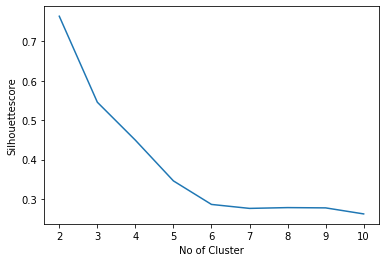

In [135]:
x=A[['topic0','topic1','topic2','topic3']]
scaler=StandardScaler().fit(x)
newx=scaler.transform(x)
kmax = 10
sil=[]

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(newx)
    labels = kmeans.labels_
    sil.append(silhouette_score(newx, labels, metric = 'euclidean'))

rangex=range(2,kmax+1)
fig,ax=plt.subplots()
ax.plot(rangex,sil)
ax.set_xlabel('No of Cluster', size=10)
ax.set_ylabel('Silhouettescore', size=10)
fig.savefig('sil plot.jpg')

In [117]:
kmeans = KMeans(n_clusters = 2).fit(x)

In [102]:
newx[:,1]

array([ 0.53959661,  0.21004432, -2.17287226, -0.37300974,  0.53959661,
        0.8691489 ,  0.43819591,  0.21004432,  0.79309837,  0.91984926,
        0.21004432, -0.98141397,  0.99589978,  0.05794326,  0.23539449,
        0.51424643,  0.26074467,  0.23539449,  0.36214538,  1.09730049,
        0.89449908, -2.37567367, -2.35032349, -0.24625886, -1.18421538,
        0.48889626, -2.19822243,  0.61564714,  0.05794326, -2.19822243,
        0.91984926,  0.26074467,  0.38749555,  0.59029696,  0.71704784,
       -1.56446803,  0.26074467,  0.56494679,  0.64099732,  0.56494679,
       -2.40102384,  0.51424643, -2.40102384,  0.51424643,  0.66634749,
        0.43819591, -1.18421538,  0.7677482 , -2.35032349,  0.74239802,
        0.69169767,  0.7677482 ,  0.89449908,  1.27475172,  0.8691489 ,
        0.74239802, -2.09682173, -2.32497332,  0.84379873, -0.82931291,
        0.08329344,  0.41284573,  0.81844855, -0.72791221,  0.89449908,
       -2.40102384,  0.48889626, -0.01810727,  0.61564714,  0.71

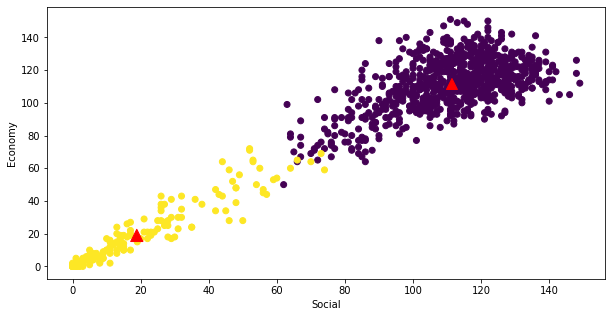

In [127]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
ax.scatter(A['topic0'], A['topic2'], c=kmeans.labels_, marker='o')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='^',c='r',s=[120,150])
ax.set_xlabel('Social', size=10)
ax.set_ylabel('Economy',size=10)
fig.savefig('cluster.jpg')

In [121]:
predict=kmeans.predict(x)
A['cluster']=predict
A.to_csv('A.to_csv')

In [12]:
A=pd.read_csv('./A.csv')
A.head()

,Unnamed: 0,user,topic0,topic1,topic2,topic3,cluster
0,0,V_Ikpeba,115,116,115,126,0
1,0,iamleonardwu,117,103,92,114,0
2,0,elrufai,10,9,10,3,1
3,0,bayoadekanmbi,89,80,88,82,0
4,0,Karamo,104,116,133,124,0


In [18]:
del A['Unnamed: 0']
del df['Unnamed: 0']

In [19]:
newdf=pd.merge(A,df,on='user')

In [29]:
len(A.loc[A['cluster']==0])/len(A)

0.8185610010427529

In [31]:
len(A.loc[A['cluster']==1])/len(A)

0.18143899895724713

In [60]:
A1=A.loc[A['cluster']==1]
A0=A.loc[A['cluster']==0]

In [62]:
list(df.hashtags.unique())


[nan,
 'AOCspeaks4Me',
 'LastBornsUnite',
 'WritingCommunity',
 'CaptionThis, WritingCommunity',
 'OperationLegend',
 'RIPRobinWilliams, WritingCommunity',
 'BenGarrison',
 'CaptionThis',
 'CaptionThis, WritingCommnunity',
 'TuckerCarlson, WritingCommunity',
 'NoSpoilers',
 'WednesdayWisdom',
 'ThePrestige',
 'Happy4thofJuly, Happy4th',
 'WritingCommunity, CaptionThis',
 'DiaperDon',
 'Batman',
 'StudentsForTrump',
 'KYPrimary',
 'GiveTwoFucks',
 'Karen',
 'McSally, LiberalHack',
 'MacTrump',
 'Hamilton',
 'RIPIanHolm',
 'PrideMonth',
 'BLM, JayPharoah',
 'ConfederateFlag',
 'DDay76',
 'DDay76, DDay',
 'DayMade',
 'ThrowbackThursday',
 'quarantinenewbiemistakes',
 'TheBronx',
 'insomniaproblems',
 'BunkerTrump',
 'angrygetsthingsdone',
 'Grant',
 'MemorialDay',
 'ImWithHer',
 'GodBlessAmerica',
 'EmpireStrikesBack, Empire40th',
 'putthescrewdriverdown',
 'CaptionThis, EmpireStrikesBack, Empire40th',
 'SuperSmashBros',
 'TrumpCommencementSpeech',
 'ObamaWasBetterAtEverything',
 'ff',
 '

In [72]:
#df.loc[df['hashtags']==re'(?:https?:\/\/)?(?:www\.)COVID']
100*(len(df[df['hashtags'].str.contains('(Vaccines|StayHome|stayhome|Covid|LetStaySafe|COVID|WearAMask)', regex=True,na=False)][['user','hashtags']])/len(df))

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


5.058327640894481

In [73]:
df_covid=df[df['hashtags'].str.contains('(Vaccines|StayHome|stayhome|Covid|LetStaySafe|COVID|WearAMask)', regex=True,na=False)][['user','hashtags']]


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [75]:
len(df_covid['user']==A0[['user']])/len(df)

0.002078402092699381

In [80]:
100*(len(df[df['hashtags'].str.contains('(Nigeria|naija|9ja)', regex=True,na=False)][['user','hashtags']])/len(df))

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


1.279872065746345